# Implementation of Q6 MLP using **Tensorflow**

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2359 - accuracy: 0.9312 - val_loss: 0.1183 - val_accuracy: 0.9638
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0995 - accuracy: 0.9695 - val_loss: 0.0944 - val_accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0682 - accuracy: 0.9788 - val_loss: 0.0860 - val_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0806 - val_accuracy: 0.9767


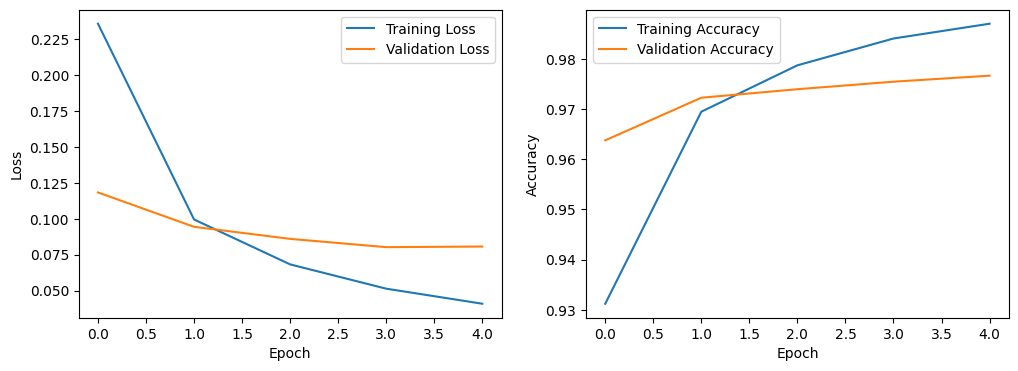

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9767
Test accuracy: 97.67%


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create MLP model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
